## 3. Understand the effect of Interferons in Pancreatic Adenocarcinoma

Interferons (IFNs) are a group of signaling proteins made and released by host cells in response to
the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I
interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the
immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and
consists of a set of 25 genes in homo sapiens.

### Part 2 

Run the GSVA (a single sample gene set enrichment) algorithm with 25 gene IFN signature as the gene set and the subsetted pancreatic cancer data as the expression dataset. 

#### Simple Intro to GSVA: 

It is an unsupervised and non-parametric method for performing gene set enrichment analysis. It performs the change in coordinates system and transforms data from a gene by sample matrix to a gene set by sample matrix [1]. This transformation does not rely on any specific phenotype, which makes it powerful and is suitable for understanding the complex data. 

Here we are trying is look at how the expression of IFNs genes causes variation within the Pancreatic Adenocarcinoma (well-defined sample) cases. 

In [53]:

## Read expression set 
exp_set = read.csv("expression_set.csv", row.names="rid" )
# exp_set

In [54]:
## convert data frame to matrix
exp_set <- as.matrix(exp_set) 
exp_set

,aab1.Primary.solid.Tumor,aab4.Primary.solid.Tumor,aab6.Primary.solid.Tumor,aab8.Primary.solid.Tumor,aab9.Primary.solid.Tumor,aaba.Primary.solid.Tumor,aabe.Primary.solid.Tumor,aabf.Primary.solid.Tumor,aabh.Primary.solid.Tumor,aabi.Primary.solid.Tumor,...,aauh.Primary.solid.Tumor,aaui.Primary.solid.Tumor,aaul.Primary.solid.Tumor,a8t3.Primary.solid.Tumor,a8t5.Primary.solid.Tumor,a89d.Solid.Tissue.Normal,a89d.Primary.solid.Tumor,a8sy.Primary.solid.Tumor,a8lh.Primary.solid.Tumor,aapl.Primary.solid.Tumor
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
AAAS,9.40,9.1,9.7,9.6,9.80,9.3,9.5,9.3,9.00,9.30,...,9.20,9.40,9.3,9.50,9.0,9.20,9.2,9.30,9.6,9.60
AACS,10.20,10.3,9.2,9.4,9.30,9.9,10.3,10.0,9.70,9.10,...,10.50,10.20,9.6,10.00,9.9,9.50,10.1,9.50,10.0,8.60
AADAT,4.80,6.3,5.9,6.4,6.50,6.0,6.6,6.3,5.40,4.10,...,6.40,5.80,5.6,6.70,6.4,5.50,6.2,6.20,6.0,4.90
AAGAB,10.20,10.4,9.9,10.5,10.10,10.3,9.4,10.1,9.70,9.80,...,10.00,9.90,10.2,9.90,10.2,9.90,10.0,9.70,10.5,10.10
AAK1,9.60,9.8,9.8,9.2,9.80,9.7,9.5,9.9,9.70,10.50,...,10.20,9.90,9.7,10.00,10.0,10.00,9.5,9.60,8.9,10.50


In [55]:
## Read gene set file 
ifn <- read.delim("type1_IFN.txt", header = FALSE, col.names = "IFN", dec = ",")
# ifn
gene_set = as.list(ifn)
gene_set

$IFN
 [1] IFIT1  IFI44  IFIT3  MX2    OAS1   OAS3   BST2   IFITM1 MX1    STAT1 
[11] IFI27  CXCL10 IFI16  IFI30  IFIH1  IFIT2  IFITM2 IRF1   IRF9   ISG15 
[21] OAS2   PSME1  SOCS1  STAT2 
24 Levels: BST2 CXCL10 IFI16 IFI27 IFI30 IFI44 IFIH1 IFIT1 IFIT2 ... STAT2

In [56]:
# gene_set[[1]][2]
# typeof(gene_set[[1]][2])
# gene_set

In [57]:

# library(limma)
geneSets <- list(IFN = c("IFIT1", "IFIT4", "IFIT3", "MX2", "OAS1","BST2", "IFITM1" , "MX1", "STAT1", "IFI27", 
                         "CXCL10", "IFI16", "IFI30", "IFIH1", "IFIT2", "IFITM2", "IRF1", "IRF9", 
                         "ISG15", "OAS2", "PSME1", "SOCS1", "STAT2"))
geneSets

$IFN
 [1] "IFIT1"  "IFIT4"  "IFIT3"  "MX2"    "OAS1"   "BST2"   "IFITM1" "MX1"   
 [9] "STAT1"  "IFI27"  "CXCL10" "IFI16"  "IFI30"  "IFIH1"  "IFIT2"  "IFITM2"
[17] "IRF1"   "IRF9"   "ISG15"  "OAS2"   "PSME1"  "SOCS1"  "STAT2"

In [58]:
## emestimate GSVA enrichment scores for IFN 
library(GSVA)  ## import GSVA library 


gsva_es <- gsva(exp_set, gene_set)
gsva_es


Estimating GSVA scores for 1 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 4 cores
  |======================================================================| 100%


,aab1.Primary.solid.Tumor,aab4.Primary.solid.Tumor,aab6.Primary.solid.Tumor,aab8.Primary.solid.Tumor,aab9.Primary.solid.Tumor,aaba.Primary.solid.Tumor,aabe.Primary.solid.Tumor,aabf.Primary.solid.Tumor,aabh.Primary.solid.Tumor,aabi.Primary.solid.Tumor,...,aauh.Primary.solid.Tumor,aaui.Primary.solid.Tumor,aaul.Primary.solid.Tumor,a8t3.Primary.solid.Tumor,a8t5.Primary.solid.Tumor,a89d.Solid.Tissue.Normal,a89d.Primary.solid.Tumor,a8sy.Primary.solid.Tumor,a8lh.Primary.solid.Tumor,aapl.Primary.solid.Tumor
IFN,0.3890645,0.665666,0.6975262,0.5517719,-0.5680738,-0.6733197,0.06648113,0.754224,-0.4082518,-0.5363576,...,-0.6569772,-0.5892199,0.09721354,-0.3979062,-0.2104749,0.1162344,0.3577832,0.5274399,0.5898278,0.5303184


## Part 3 

Check distribution of GSVA scores for samples. Do the GSVA scores segregate samples into subtypes?

Here, we have plotted the density estimation of the GSVA score. By looking at it we can conclude that the sample of Adenocarcinoma separates into 3 subtypes.


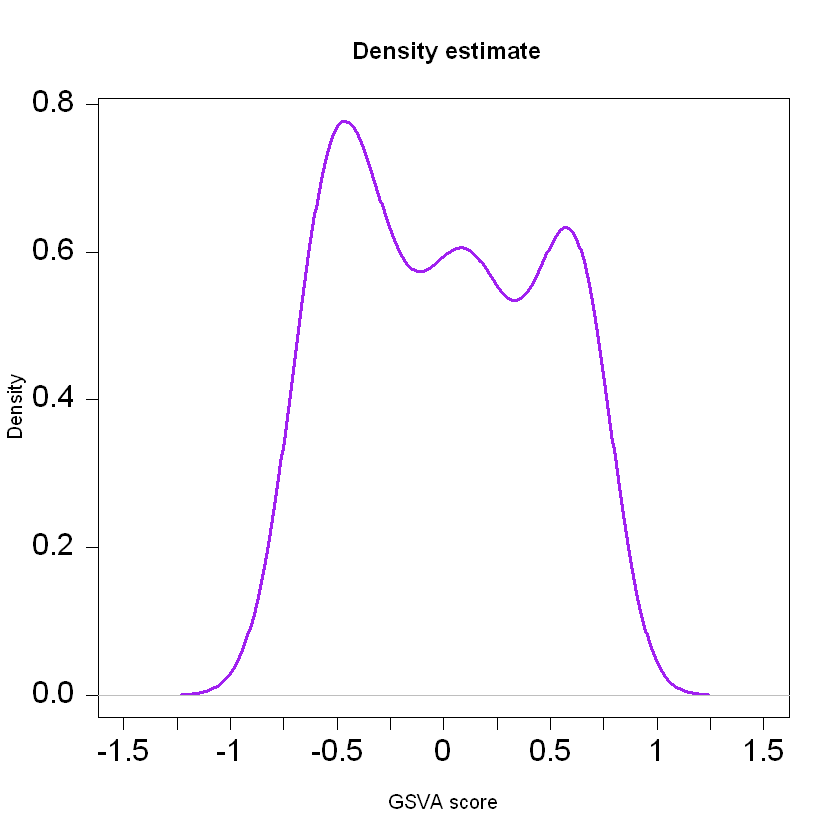

In [60]:
plot(density(as.vector(gsva_es)), main=" Density estimate",
     xlab="GSVA score", lwd=3, las=2, col = "purple", xaxt="n", xlim = c(-1.5, 1.5), cex.axis=1.5)
axis(1, at=seq(-1.5, 1.5, by=0.25), labels = seq(-1.5, 1.5, by=0.25), cex.axis= 1.5)

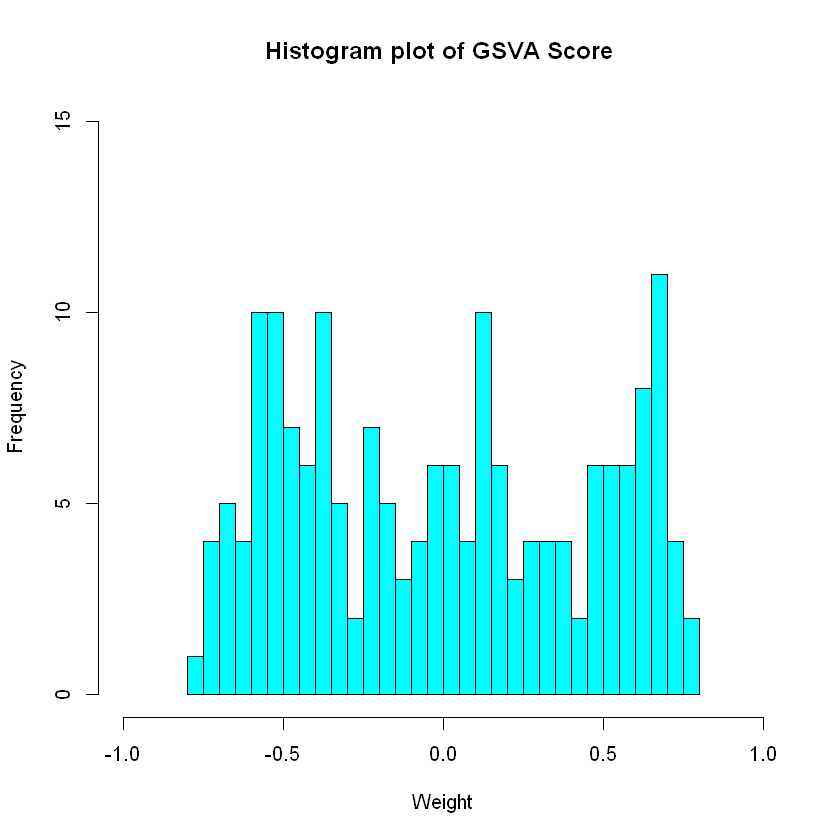

In [61]:
# Create the histogram.
v = as.vector(gsva_es)
hist(v, main="Histogram plot of GSVA Score ", xlab = "Weight",col = "cyan",border = "black", xlim = c(-1,1), ylim = c(0, 15), breaks = 50)

## Rreferences:
**(Not in order)**

1. https://bioconductor.org/packages/release/bioc/vignettes/GSVA/inst/doc/GSVA.pdf
2. https://clincancerres.aacrjournals.org/content/23/12/3129
3. https://bioconductor.org/packages/release/bioc/manuals/GSVA/man/GSVA.pdf
4. https://towardsdatascience.com/decoding-gene-set-variation-analysis-8193a0cfda3
5. https://artyomovlab.wustl.edu/phantasus/
6. https://en.wikipedia.org/wiki/Pancreatic_cancer
7. https://en.wikipedia.org/wiki/RNA
8. https://bitesizebio.com/13542/what-everyone-should-know-about-rna-seq/